# Homework 2

### 1. Visualization of the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline


In [35]:
plot_data = pd.read_csv('data.csv',sep=' ')
plot_data.head()

,x1,x2
0,5.219,7.998
1,5.102,2.163
2,4.089,4.327
3,5.046,8.000
4,4.596,2.238


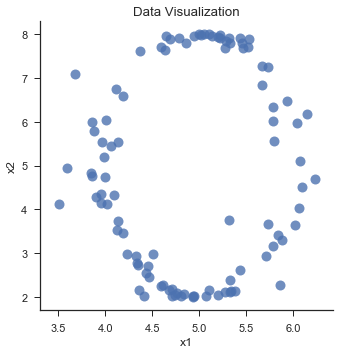

In [36]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('x1', 'x2', 
           data=plot_data, 
           fit_reg=False,   
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Data Visualization')
plt.xlabel('x1')
plt.ylabel('x2')

### 2. Propose a Generative Model

### 3. Implement generative model and sample data from the model

### 4. Visualize synthetic data to show that your model generates a 'similar dataset 

### 5.  How can you assess if two datasets are similar? Discuss